<a href="https://colab.research.google.com/github/raoak18/Hotels-Data-Analysis-EDA/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

#  **Some basic steps which will have to start EDA.**

# **First Step-Firstly we will import all the imortant libraries which helps us in our Analysis process**

---



---



In [149]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# **Second Step-Now we will mount our google drive and import the data into a variable from CSV file.**


---



---



In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
#Now creating the DataFrame from the csv file.
hotel_data=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project/Hotel Bookings-Aakash Yadav/Hotel Bookings.csv')

#**Third Step- Now we will check whether our data is loaded successfull or not and then we will do some basic analysis of our data**

In [34]:
#Lets check whether DataFrame created successfully or not.
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [35]:
hotel_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [50]:
hotel_data.shape

(119390, 32)

In [51]:
#Lets analyse the basic information of our DataFrame:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [52]:
#Now analyse some basic description of our DataFrame.
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [53]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **Results:**
* From the above operations we can clearly sees that the our data contains 119390 rows and 32 variables(columns) out of which maximum columns don't have null values in it.
* Two columns(Company and Agent) contains large number of null values.

# **Fourth Step-Cleaning the data and Handling the null values.**

* Let we check the which columns has the most number of null values.

In [54]:
null_values=hotel_data.isna().sum().sort_values(ascending=False).head(8).reset_index().rename({0:"number of null values"},axis=1)
null_values

,index,number of null values
0,company,112593
1,agent,16340
2,country,488
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0
6,booking_changes,0
7,deposit_type,0


* As we can cleary see that only four columns(*company*, *agent*, *country*  and *children*) contains the null values. But the "company" and "agent" columns contains very large number of null values i.e. 112593 and 16340 respectevily. So we can drop these columns.





In [55]:
hotel_data.drop(['company', 'agent'], axis=1,inplace=True)

In [56]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

* We did not removed the country column because it contains 488 null values out of 119390, which is negligible. So for dealing with these null values we will replace those null values with XYZ.

In [57]:
hotel_data["country"]=hotel_data['country'].fillna('XYZ')

In [58]:
#Now our updated DataFrame is of size:
hotel_data.shape

(119390, 30)

# Four children column 4 rows have null values,which is very less. So we can replace these null values with 0.

In [59]:
hotel_data['children']=hotel_data['children'].fillna(0)

In [60]:
hotel_data['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

* changing this column data type into integer


In [62]:
hotel_data['children']=hotel_data['children'].astype(int)

In [63]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

#**Now our data is free from all the null values.**

In [64]:
hotel_data.isnull().sum().head(5)

hotel                 0
is_canceled           0
lead_time             0
arrival_date_year     0
arrival_date_month    0
dtype: int64

#Now we are removing those rows in which total number of guests is equal to 0 i.e. adult+children+babies==0

In [65]:
hotel_data[(hotel_data.children+hotel_data.adults+hotel_data.babies)==0].shape

(180, 30)

* 180 rows have total number of guests=0

#Droping those 180 rows.

In [66]:
hotel_data=hotel_data.drop(hotel_data[(hotel_data.children+hotel_data.adults+hotel_data.babies)==0].index)

# For reducing number of columns we can drop the columns namely adult,children, babies and create a single column in place of these namely Total number of guest.

In [67]:
hotel_data['Total_number_of_guest']=hotel_data['adults']+hotel_data['children']+hotel_data['babies']
hotel_data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_number_of_guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2


In [68]:
hotel_data.drop(['adults','children','babies'], axis=1, inplace=True)

# **Now our data is cleaned. Now we will do the EDA on it.**

In [69]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   meal                            119210 non-null  object 
 10  country                         119210 non-null  object 
 11  market_segment                  119210 non-null  object 
 12  distribution_cha

#**Question1. Which type of hotel genrally people prefer to book?**

In [70]:
#let copy the above cleaned hotel data into a new variable data.
data=hotel_data.copy()

In [71]:
hotel_type=data['hotel'].value_counts().reset_index().rename(columns={'index':'Hotel Type', 'hotel':"Number of bookings"})
hotel_type

,Hotel Type,Number of bookings
0,City Hotel,79163
1,Resort Hotel,40047


#Lets plot a pie chart for this:

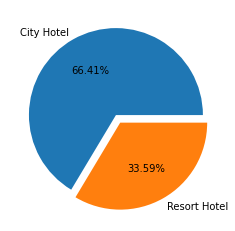

In [72]:
plt.pie(x=hotel_type['Number of bookings'], labels=hotel_type['Hotel Type'], explode=[0,.1],autopct='%1.2f%%')
plt.show()

#**Conclusion:**
* From the above we can cleary see that the people prefer to book City Hotels more as compare to Resort Hotels. 

# **Now we only deal with the data in which bookings are not cancelled.**

In [77]:
non_canceled=data[data['is_canceled']==0]

In [78]:
non_canceled.shape

(75011, 28)

#lets check the reletion between bookings with home contries of guests.


In [97]:
country_wise=non_canceled.groupby('country')['Total_number_of_guest'].count().sort_values(ascending=False).reset_index()
country_wise

,country,Total_number_of_guest
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,SMR,1
162,LCA,1
163,KIR,1
164,GUY,1


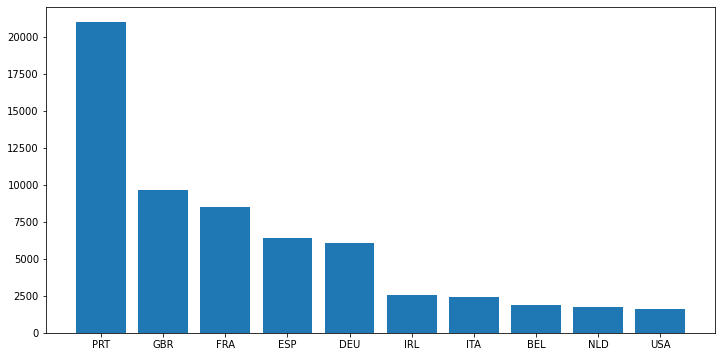

In [106]:
#ploting bar graph for the top 10 contries
plt.figure(figsize=(12,6))
plt.bar(x=country_wise['country'].head(10), height=country_wise['Total_number_of_guest'].head(10))
plt.show()


#**Now we fill find how much guests pay for a room per night?**
Both hotels have different room types and different meal arrangements.Seasonal factors are also important, So the prices varies a lot.



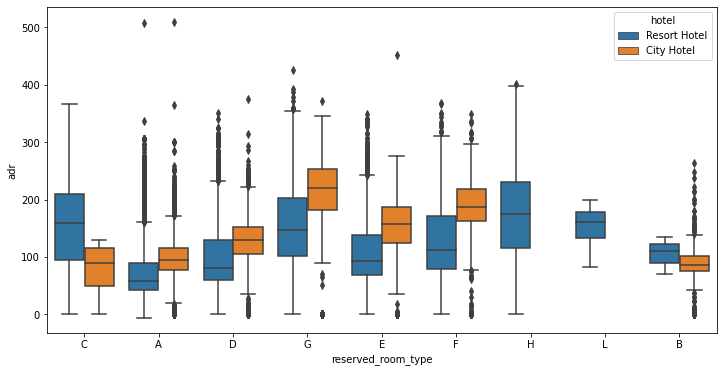

In [110]:
plt.figure(figsize=(12,6))
sns.boxplot(x='reserved_room_type', y='adr', data=non_canceled, hue='hotel')
plt.show()

* The figure shows that the average price per room depends on its type and the standard deviation.




#**Now we will check  that how does the price vary overy the year?**

In [113]:
resort_hotel_data=non_canceled[non_canceled['hotel']=='Resort Hotel']
city_hotel_data=non_canceled[non_canceled['hotel']=='City Hotel']

In [116]:
non_canceled.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'Total_number_of_guest'],
      dtype='object')

In [117]:
resort_hotel=resort_hotel_data.groupby('arrival_date_month')['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [118]:
city_hotel=city_hotel_data.groupby('arrival_date_month')['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [126]:
#Now merging these two:
monthwise_price=pd.merge(left=resort_hotel, right=city_hotel,on="arrival_date_month")
monthwise_price=monthwise_price.rename(columns={"adr_x":'average price for resort', "adr_y":"average price for city hotel"})
monthwise_price

,arrival_date_month,average price for resort,average price for city hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


#Now we observe here that month column is not in order, and if we visualize we will get improper conclusions. So we set them in proper order first.

In [128]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays
import sort_dataframeby_monthorweek as sd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=cde7dfbfa75468206d1bb045b17ea4c33ec767bf9943b4e4adac53ac4b7d3e0a
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=d9a98f0037485a4bbe9a93be0e985925bd09e3be873925f1d6f9c51935b74f9c
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [135]:
import sort_dataframeby_monthorweek as sd
final_price=sd.Sort_Dataframeby_Month(monthwise_price, "arrival_date_month")
final_price

,arrival_date_month,average price for resort,average price for city hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [152]:
plt.figure(figsize=(12,6))
px.line(final_price, x='arrival_date_month', y=['average price for resort','average price for city hotel'], title='Total no of guests per Months')


<Figure size 864x432 with 0 Axes>

#**Observations:**
* This plot clearly shows that prices in the Resort Hotel are start increasing after the month of may and goes much higher in july to August. In the month of August price are highest.Price of resort are high in the month range June to September.
* The variation in the price of City Hotels are very less. Price are slightly high in the month range April to August. Price are highest in the month of May.
* Price are lessor for both Resorts and City hotel in the month range of October to March.

#**Now we will check which are the most busy months of the year?**